**Introduction**

For this data analysis task, I chose the Titanic dataset from Kaggle — a classic dataset often used to explore classification problems. The dataset captures information about passengers aboard the RMS Titanic, including details like age, gender, ticket class, and whether or not they survived.

My goal in this project was to clean the data, explore key variables, and uncover meaningful patterns and trends related to survival. Through this process, I applied fundamental data analysis techniques such as handling missing values, feature engineering, and visual exploration. This task not only helped strengthen my data handling skills but also provided a practical way to understand how data tells a story when carefully analyzed.

**Importing necessary libraries**
I began by importing the necessary libraries that I would use to analyse the data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the data**

I then loaded the data ang got a brief statistical summary of what my data consisted of.
Here we see that some of the attributes such as Age contained missing values that we needed to handle before doing the analysis for better results

In [3]:
df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Checking for missing values**

Here I did a more comprehensive search for missing values and discovered that the columns that contained  missing values were age, Cabin and  embarked and the respective number of values that were missing

In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Checking for distribution of Age**

Since age was an important factor to consider, the column could not be dropped. Therefore inorder to know the correct values to use when imputing I checked for the distribution of data and found that my data was slightly rightly skewed hence opted to use the median for imputation.

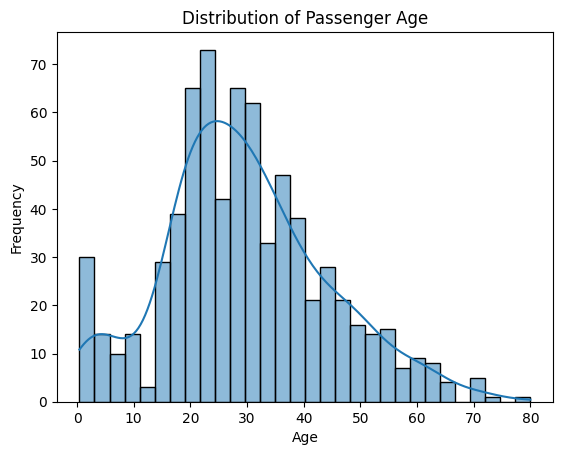

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [8]:
df['Age'].skew()


np.float64(0.38910778230082704)

**Handling missing values**

All the missing values were handled as follows:

**Age:** Imputation by median

**Cabin:** dropping the column entirely.

**Explanation**

The Cabin column had a large proportion of missing entries(687 missing values) — over 77% of the data. Since the missingness was too significant to fill reliably and the feature itself was not critical for my analysis, I chose to drop the column entirely.

**Embarked:** Imputated by Mode

**Explanation**

The Embarked column, which shows the port of embarkation, had only two missing values. I filled them using the mode (most frequent value), which was 'S' (Southampton), as it preserved the distribution and had minimal impact on the dataset.

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [11]:
df.drop('Cabin', axis=1, inplace=True)


In [12]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [13]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Feature Engineering**

To enhance the dataset and capture deeper patterns related to survival, I created a few new features based on existing columns:

 **Title:**I extracted the title (e.g., Mr, Miss, Mrs) from each passenger’s name. Titles often reflect social status, gender, and age — all of which could influence survival chances.

**FamilySize:**  This feature was created by combining the number of siblings/spouses (SibSp) and parents/children (Parch) a passenger had aboard, plus one (the passenger themselves). It helped capture whether passengers were alone or traveling with family.

**IsAlone:** Based on FamilySize, this binary feature identifies passengers who were traveling alone. Solo travelers tended to have different survival outcomes compared to those with family.

**AgeBand:** Instead of analyzing individual age values, I grouped passengers into age categories: Child, Teen, Young Adult, Adult, and Senior. This made it easier to compare survival trends across age groups.

In [14]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df['AgeBand'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80],
                       labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])


**Overall Survival Count**


I began by exploring the target variable, Survived. The chart showed that more passengers did not survive than those who did, meaning the data is imbalanced. This is an important observation for both analysis and future modeling.

<Axes: xlabel='Survived', ylabel='count'>

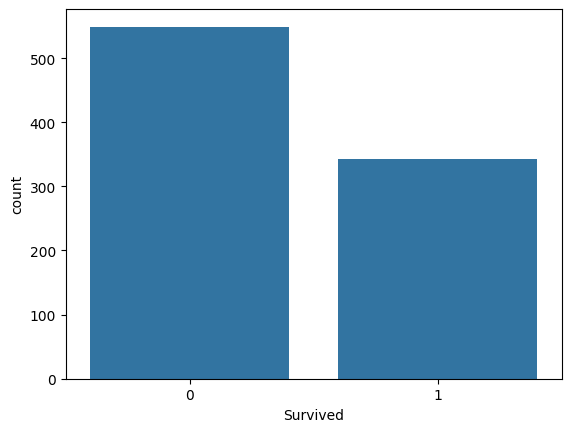

In [15]:
sns.countplot(x='Survived', data=df)


**Survival by Gender**

Next, I explored survival rates based on gender. The chart clearly showed that females had a much higher survival rate compared to males. This suggests that gender played a significant role in survival, possibly due to the "women and children first" evacuation approach.

<Axes: xlabel='Sex', ylabel='count'>

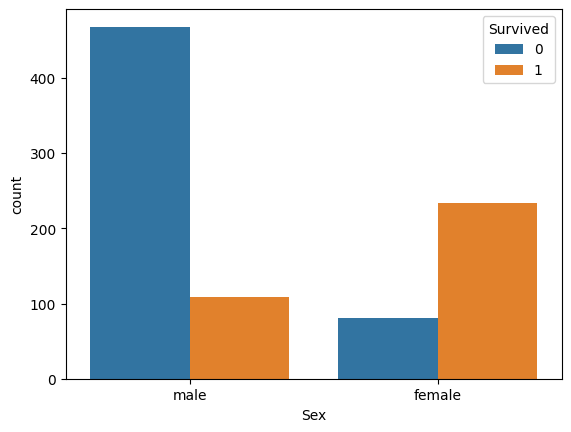

In [16]:
sns.countplot(x='Sex', hue='Survived', data=df)


**Survival by Passenger Class**

I then looked at survival across passenger classes. The results showed that passengers in 1st class had the highest survival rate, while those in 3rd class had the lowest. This highlights how social and economic status may have influenced access to lifeboats and safety.

<Axes: xlabel='Pclass', ylabel='count'>

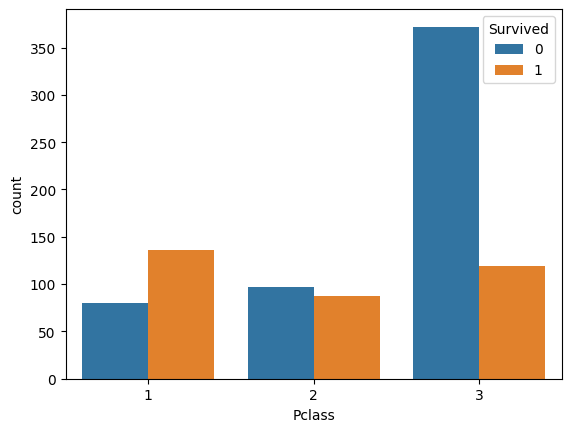

In [17]:
sns.countplot(x='Pclass', hue='Survived', data=df)


**Age Distribution**

I examined the distribution of passenger ages. Most passengers were between 20 and 40 years old, and the distribution was slightly right-skewed, meaning there were more younger passengers and fewer older ones. This helped guide how I grouped ages later in the analysis.

<Axes: xlabel='Age', ylabel='Count'>

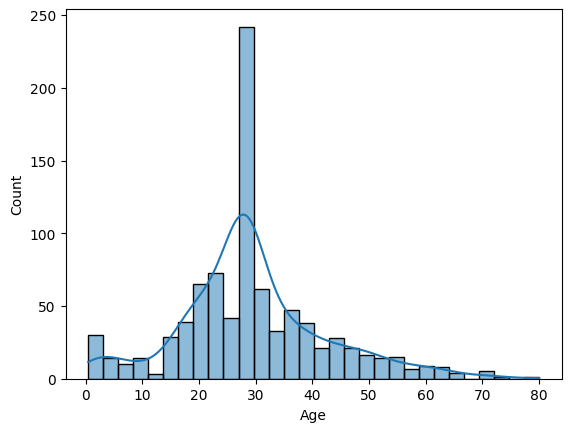

In [18]:
sns.histplot(df['Age'], bins=30, kde=True)


**Survival by Age Group**

I analyzed survival across age bands. The chart showed that children had the highest survival rate, followed by teens and young adults. Seniors had the lowest survival, suggesting that age played a key role in survival outcomes during the disaster.

<Axes: xlabel='AgeBand', ylabel='count'>

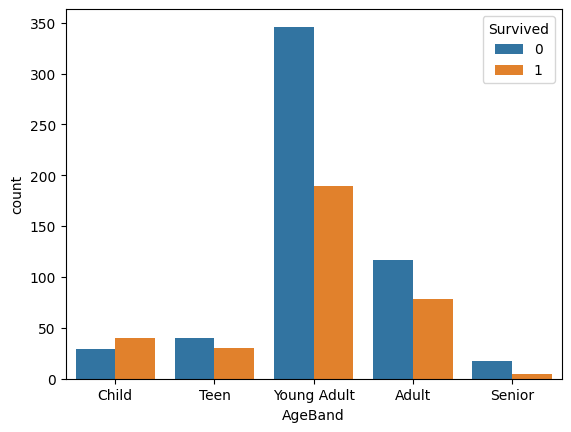

In [19]:
sns.countplot(x='AgeBand', hue='Survived', data=df)


**Survival by Family Size**

I explored how the number of family members onboard affected survival. Passengers with small families (2–4 members) had better survival rates, while those who were alone or in large families were less likely to survive. This suggests that having close family support may have improved chances during the evacuation.

<Axes: xlabel='FamilySize', ylabel='count'>

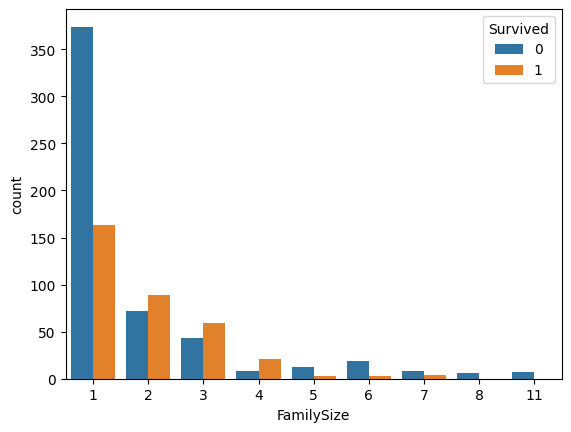

In [20]:
sns.countplot(x='FamilySize', hue='Survived', data=df)


**Feature Correlation**

To understand how numerical features relate to each other and to the target variable (Survived), I created a correlation heatmap. It showed that being female, higher passenger class, and smaller family size had the strongest positive correlation with survival. On the other hand, features like being male and traveling alone were negatively correlated with survival.

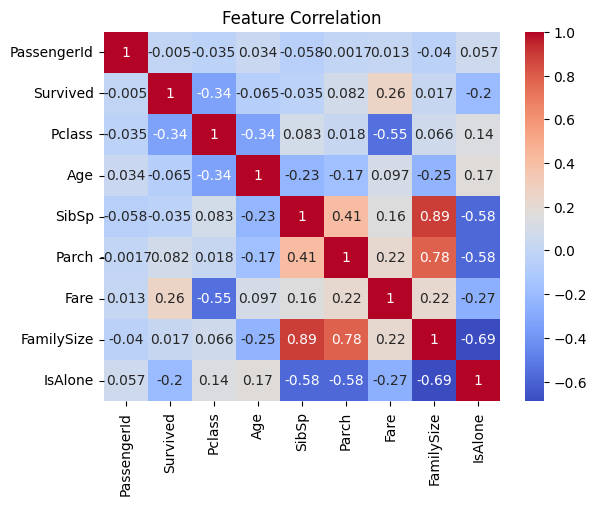

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


**Conclusion**

This analysis of the Titanic dataset revealed clear patterns in survival. Key factors that influenced whether a passenger survived included gender, passenger class, age group, and family size. Women, children, and passengers in 1st class were more likely to survive, while those traveling alone or in 3rd class faced lower chances.

Through data cleaning, feature engineering, and visual exploration, I was able to turn raw data into meaningful insights. This project strengthened my skills in handling real-world datasets and interpreting patterns that can be used to guide further analysis or predictive modeling.